In [12]:
from matplotlib import pyplot
from pathlib import Path
import pickle
import json

In [3]:
root_path = Path("./")

In [4]:
saveDataPath = root_path / "/model/pheme9/3label/unaugmented/GCN"

In [5]:
saveDataPath

PosixPath('/model/pheme9/3label/unaugmented/GCN')

In [3]:
def getTimePlot( data, title, metric="f1 score", limit=None ):
    x = list( data.keys() )
    
    if limit is not None:
        x = [ i for i in x if i <= limit]
    
    if limit is not None:
        y = [ y[metric] for x, y in data.items() if x <= limit ]
    else:
        y = [ y[metric] for x, y in data.items() ]
    
    pyplot.plot(x, y)
    pyplot.title(title)
    pyplot.xlabel('Time')
    pyplot.ylabel(metric)

In [4]:
def getCommentPlot( data, title, metric="f1 score", limit=None ):
    x = list( data.keys() )
    
    if limit is not None:
        x = [ i for i in x if i <= limit]
    
    if limit is not None:
        y = [ y[metric] for x, y in data.items() if x <= limit ]
    else:
        y = [ y[metric] for x, y in data.items() ]
    
    pyplot.plot(x, y)
    pyplot.title(title)
    pyplot.xlabel('Comments')
    pyplot.ylabel(metric)

In [5]:
def getEarlyRDPlots( timeDataPath, commentDataPath ):
    with open( timeDataPath, "rb" ) as handle:
        timeData = pickle.load( handle )
        
    with open( commentDataPath, "rb" ) as handle:
        commentData = pickle.load( handle )
        
    getTimePlot( timeData, "Early rumour based on time" )
    
    pyplot.show()
    
    pyplot.clf()
    
    getCommentPlot( commentData, "Early rumour based on comment" )

In [6]:
timeDataPath = saveDataPath / "average_time_result.pickle"
timeDataPath

PosixPath('model/pheme9/3label/unaugmented/GCN/average_time_result.pickle')

In [7]:
commentDataPath = saveDataPath / "average_comment_result.pickle"
commentDataPath

PosixPath('model/pheme9/3label/unaugmented/GCN/average_comment_result.pickle')

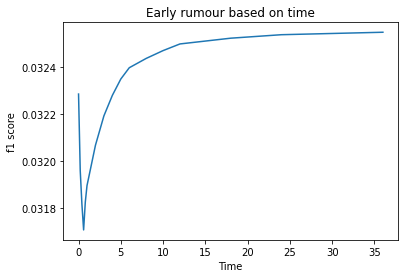

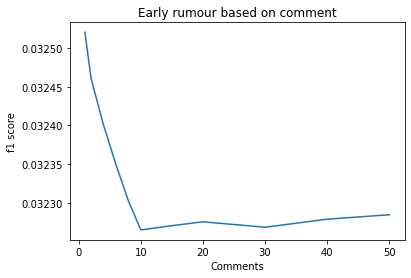

In [8]:
getEarlyRDPlots(timeDataPath, commentDataPath)

## All results

In [16]:
# root_path = Path( "." )
root_path = Path.cwd()

In [17]:
root_path

PosixPath('/home/ubuntu/rumour_detection/gnn_rd')

In [13]:
import tabulate

In [14]:
def printTable(metric_score):
    l = [[i, j] for i, j in metric_score.items()]

    table = tabulate.tabulate(
        l, headers=['Metric', 'Value'], tablefmt='orgtbl')
    print(table)

In [6]:
# saveDataPath = root_path / "model/pheme9/3label/"
saveDataPath = root_path / "model"
saveDataPath

PosixPath('/home/ubuntu/rumour_detection/gnn_rd/model')

SAVE IN EXPERIEMENT RUN
COLUMNS -> Model, Data Aug, Data Labels, Dataset, Metrics => [GCN/GAT, un/aug/im, 3label/2label, Pheme9/Pheme5, Precision..] 

In [19]:
import pandas as pd
def getResultInDF( saveDataPath ):

    dataFrame = {
        "Model" : [],
        "Data Aug" : [],
        "Label" : [],
        "Dataset" : [],
        "Accuracy" : [],
        "Precision" : [],
        "Recall" : [],
        "F1-score" : []
    }
    for dataset_path in saveDataPath.iterdir():
        # pheme9/pheme5

        if dataset_path.exists() == False:
            continue

        dataset = dataset_path.name

        for label_path in dataset_path.iterdir():
            # 3label/2label
            if label_path.exists() == False:
                continue

            label = label_path.name 

            for x in label_path.iterdir():

                if x.exists() == False:
                    continue

                # unaugmented, augmented, improved
                data_aug_path = label_path / x

                data_aug = x.name



                for model_name_path in data_aug_path.iterdir():

                    if model_name_path.exists() == False:
                        continue

                    model_name = model_name_path.name

                    if (model_name_path/ "average_results.json").exists() == False:
                        continue

                    with open( model_name_path / "average_results.json", encoding="utf8") as ofile:
                        results = json.load(ofile)


                    dataFrame["Model"].append( model_name )
                    dataFrame["Data Aug"].append( data_aug )
                    dataFrame["Label"].append( label )
                    dataFrame["Dataset"].append( dataset )
                    dataFrame["Accuracy"].append( results['Accuracy'] )
                    dataFrame["Precision"].append( results['Precision'] )
                    dataFrame["Recall"].append( results['Recall'] )
                    dataFrame["F1-score"].append( results['F1 score'] )


    df = pd.DataFrame(dataFrame)
    return df

In [30]:
from matplotlib import pyplot
def getGraphs( df ):
    for i in df.groupby(['Model', 'Label', 'Dataset']):

        if len(i[1]) < 3:
            continue

        print(i[0])
        pyplot.clf()


        data_aug = list( i[1]["Data Aug"] )
        acc = list( i[1]["Accuracy"] )
        f1 = list( i[1]["F1-score"] )
        recall = list( i[1]["Recall"] )
        prec = list( i[1]["Precision"] )

        acc_map = { i:j for i, j in zip(data_aug, acc) }
        prec_map = { i:j for i, j in zip(data_aug, prec) }
        recall_map = { i:j for i, j in zip(data_aug, recall) }
        f1_map = { i:j for i, j in zip(data_aug, f1) }

        x = ["unaugmented", "augmented", "improved"]
        y = [ acc_map["unaugmented"], acc_map["augmented"], acc_map["improved"] ]
        pyplot.plot( x, y, color="blue" )

#         x = ["unaugmented", "augmented", "improved"]
#         y = [ prec_map["unaugmented"], prec_map["augmented"], prec_map["improved"] ]
#         pyplot.plot( x, y, color="red" )

#         x = ["unaugmented", "augmented", "improved"]
#         y = [ recall_map["unaugmented"], recall_map["augmented"], recall_map["improved"] ]
#         pyplot.plot( x, y, color="orange" )

        x = ["unaugmented", "augmented", "improved"]
        y = [ f1_map["unaugmented"], f1_map["augmented"], f1_map["improved"] ]
        pyplot.plot( x, y, color="green" )
        pyplot.show()
        pyplot.clf()

In [35]:
saveDataPath = root_path / "model30"
print( saveDataPath )
df = getResultInDF( saveDataPath )
df

/home/ubuntu/rumour_detection/gnn_rd/model30


,Model,Data Aug,Label,Dataset,Accuracy,Precision,Recall,F1-score
0,GCN,unaugmented,2label,pheme5,0.424661,0.407554,0.411731,0.408570
1,GAT,unaugmented,2label,pheme5,0.412915,0.396403,0.404478,0.398060
2,GCN,improved,2label,pheme5,0.421648,0.404412,0.409060,0.406217
3,GAT,improved,2label,pheme5,0.413309,0.395719,0.396635,0.394949
4,GCN,augmented,2label,pheme5,0.417728,0.404584,0.414121,0.405457
5,GAT,augmented,2label,pheme5,0.410965,0.395001,0.397005,0.393631
6,GCN,unaugmented,3label,pheme9,0.548577,0.390000,0.368153,0.334912
7,GAT,unaugmented,3label,pheme9,0.791269,0.390890,0.462963,0.417079
8,GCN,improved,3label,pheme9,0.700265,0.392165,0.476119,0.416307
9,GAT,improved,3label,pheme9,0.791269,0.390890,0.462963,0.417079


('GAT', '2label', 'pheme5')


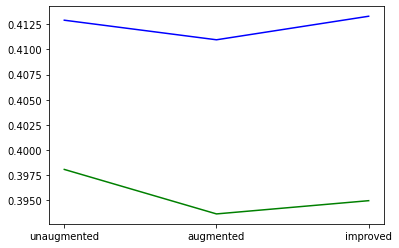

('GAT', '2label', 'pheme9')


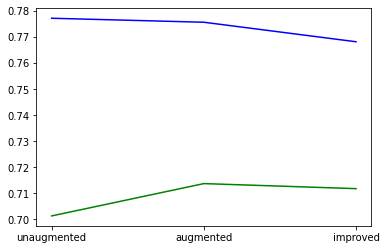

('GAT', '3label', 'pheme9')


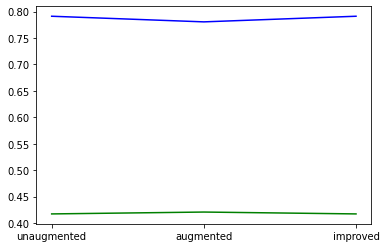

('GCN', '2label', 'pheme5')


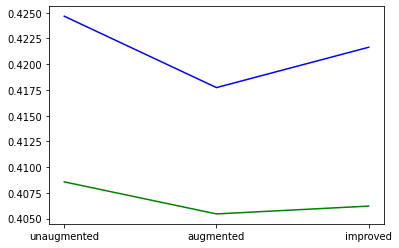

('GCN', '2label', 'pheme9')


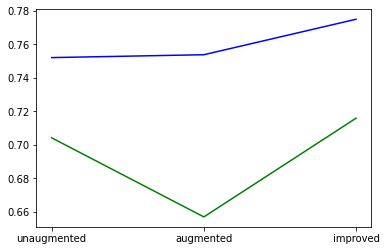

('GCN', '3label', 'pheme9')


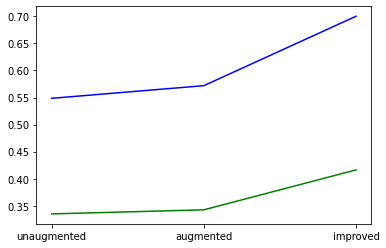

<Figure size 432x288 with 0 Axes>

In [36]:
getGraphs( df )

In [37]:
for i in df.groupby(['Model', 'Label', 'Dataset']):
    print(i[0])
    print(i[1])
    print()

('GAT', '2label', 'pheme5')
  Model     Data Aug   Label Dataset  Accuracy  Precision    Recall  F1-score
1   GAT  unaugmented  2label  pheme5  0.412915   0.396403  0.404478  0.398060
3   GAT     improved  2label  pheme5  0.413309   0.395719  0.396635  0.394949
5   GAT    augmented  2label  pheme5  0.410965   0.395001  0.397005  0.393631

('GAT', '2label', 'pheme9')
   Model     Data Aug   Label Dataset  Accuracy  Precision    Recall  F1-score
13   GAT  unaugmented  2label  pheme9  0.777043   0.703658  0.701328  0.701308
15   GAT     improved  2label  pheme9  0.768038   0.713403  0.715372  0.711757
17   GAT    augmented  2label  pheme9  0.775512   0.715768  0.721852  0.713690

('GAT', '3label', 'pheme9')
   Model     Data Aug   Label Dataset  Accuracy  Precision    Recall  F1-score
7    GAT  unaugmented  3label  pheme9  0.791269   0.390890  0.462963  0.417079
9    GAT     improved  3label  pheme9  0.791269   0.390890  0.462963  0.417079
11   GAT    augmented  3label  pheme9  0.780626  

In [38]:
saveDataPath = root_path / "model70"
print( saveDataPath )
df = getResultInDF( saveDataPath )
df

/home/ubuntu/rumour_detection/gnn_rd/model70


,Model,Data Aug,Label,Dataset,Accuracy,Precision,Recall,F1-score
0,GCN,unaugmented,2label,pheme5,0.420568,0.404810,0.413584,0.407486
1,GAT,unaugmented,2label,pheme5,0.414904,0.398097,0.406397,0.400496
2,GCN,improved,2label,pheme5,0.421475,0.405919,0.412553,0.407528
3,GAT,improved,2label,pheme5,0.412018,0.394279,0.396402,0.393880
4,GCN,augmented,2label,pheme5,0.423571,0.408686,0.412664,0.408578
5,GAT,augmented,2label,pheme5,0.405543,0.387318,0.390807,0.388609
6,GCN,unaugmented,3label,pheme9,0.474104,0.321026,0.373643,0.277245
7,GAT,unaugmented,3label,pheme9,0.791269,0.390890,0.462963,0.417079
8,GCN,improved,3label,pheme9,0.669136,0.385492,0.470288,0.400651
9,GAT,improved,3label,pheme9,0.791269,0.390890,0.462963,0.417079


('GAT', '2label', 'pheme5')


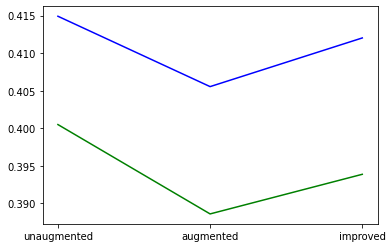

('GAT', '2label', 'pheme9')


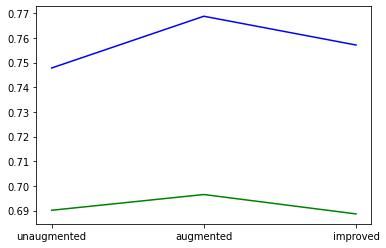

('GAT', '3label', 'pheme9')


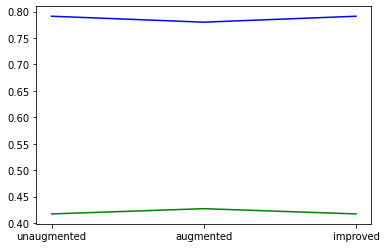

('GCN', '2label', 'pheme5')


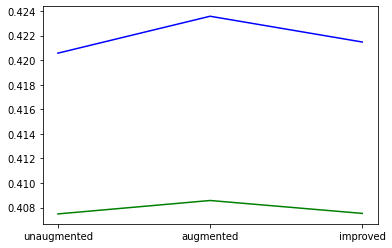

('GCN', '2label', 'pheme9')


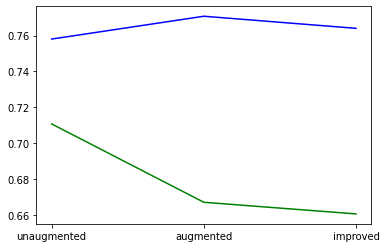

('GCN', '3label', 'pheme9')


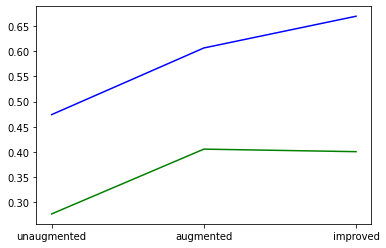

<Figure size 432x288 with 0 Axes>

In [39]:
getGraphs( df )

In [40]:
for i in df.groupby(['Model', 'Label', 'Dataset']):
    print(i[0])
    print(i[1])
    print()

('GAT', '2label', 'pheme5')
  Model     Data Aug   Label Dataset  Accuracy  Precision    Recall  F1-score
1   GAT  unaugmented  2label  pheme5  0.414904   0.398097  0.406397  0.400496
3   GAT     improved  2label  pheme5  0.412018   0.394279  0.396402  0.393880
5   GAT    augmented  2label  pheme5  0.405543   0.387318  0.390807  0.388609

('GAT', '2label', 'pheme9')
   Model     Data Aug   Label Dataset  Accuracy  Precision    Recall  F1-score
13   GAT  unaugmented  2label  pheme9  0.747803   0.693901  0.721212  0.690123
15   GAT     improved  2label  pheme9  0.757119   0.686618  0.696460  0.688641
17   GAT    augmented  2label  pheme9  0.768787   0.696581  0.700567  0.696505

('GAT', '3label', 'pheme9')
   Model     Data Aug   Label Dataset  Accuracy  Precision    Recall  F1-score
7    GAT  unaugmented  3label  pheme9  0.791269   0.390890  0.462963  0.417079
9    GAT     improved  3label  pheme9  0.791269   0.390890  0.462963  0.417079
11   GAT    augmented  3label  pheme9  0.780065  